Mounted at /content/drive
Drive mounted successfully

Verifying folder structure...
Found test directory
  ├── Found OverRipe category
  ├── Found Ripe category
  ├── Found Unripe category
  ├── Found VeryRipe category
Found train directory
  ├── Found OverRipe category
  ├── Found Ripe category
  ├── Found Unripe category
  ├── Found VeryRipe category
Found valid directory
  ├── Found OverRipe category
  ├── Found Ripe category
  ├── Found Unripe category
  ├── Found VeryRipe category

Checking and renaming mismatched images...

Total files renamed: 0

Counting images in dataset...

=== Banana Ripeness Dataset Summary ===

Total images in dataset: 7068

Images by split:
test: 1052 images (14.9%)
train: 4964 images (70.2%)
valid: 1052 images (14.9%)

Images by category:
OverRipe: 1767 images (25.0%)
Ripe: 1767 images (25.0%)
Unripe: 1767 images (25.0%)
VeryRipe: 1767 images (25.0%)

Detailed breakdown by split and category:
Split     test  train  valid
Category                    
Over

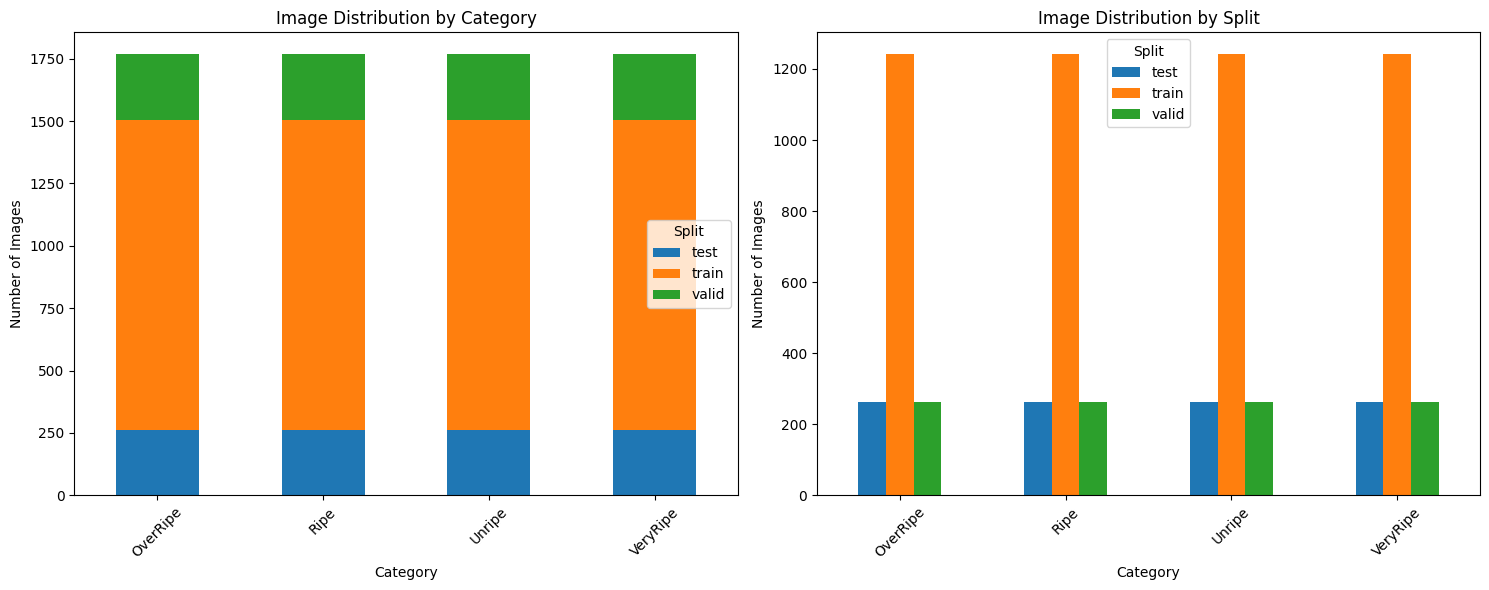

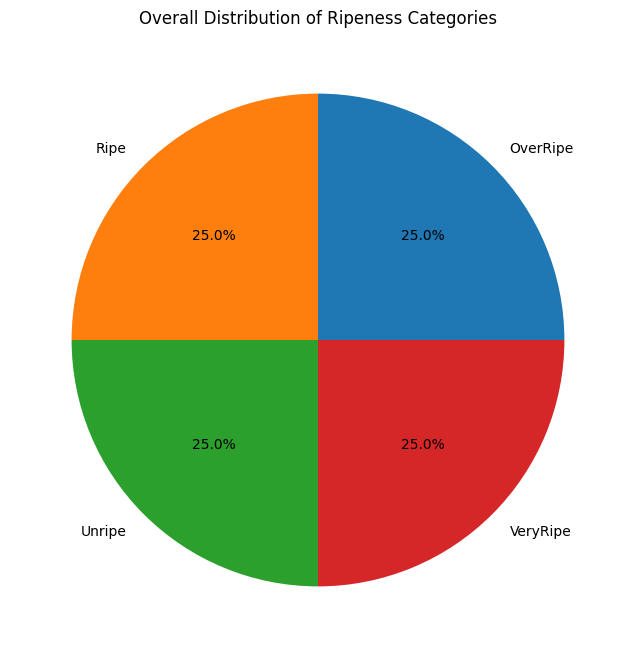


Detailed distribution saved to 'mangous_dataset_distribution.csv'


In [24]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

def mount_drive():
    """Mount Google Drive"""
    try:
        drive.mount('/content/drive', force_remount=True)
        print("Drive mounted successfully")
    except Exception as e:
        print(f"Error mounting drive: {str(e)}")
        return False
    return True

def rename_mismatched_images(base_path):
    """
    Rename images where the prefix doesn't match the folder name
    """
    categories = ['OverRipe', 'Ripe', 'Unripe', 'VeryRipe']
    splits = ['test', 'train', 'valid']
    renamed_count = 0

    for split in splits:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            continue

        for category in categories:
            category_path = os.path.join(split_path, category)
            if not os.path.exists(category_path):
                continue

            # Get all image files
            image_files = [f for f in os.listdir(category_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

            for image_file in image_files:
                # Check if image filename starts with a different category name
                for other_category in categories:
                    if image_file.startswith(other_category + '_') and other_category != category:
                        # Create new filename with correct category prefix
                        new_name = category + '_' + image_file[len(other_category + '_'):]
                        old_path = os.path.join(category_path, image_file)
                        new_path = os.path.join(category_path, new_name)

                        try:
                            os.rename(old_path, new_path)
                            print(f"Renamed: {image_file} -> {new_name}")
                            renamed_count += 1
                        except Exception as e:
                            print(f"Error renaming {image_file}: {str(e)}")

    print(f"\nTotal files renamed: {renamed_count}")
    return renamed_count

def verify_folder_structure(base_path):
    """
    Verify the folder structure exists and is correct
    """
    required_splits = ['test', 'train', 'valid']
    required_categories = ['OverRipe', 'Ripe', 'Unripe', 'VeryRipe']

    if not os.path.exists(base_path):
        print(f"Error: Base directory not found at {base_path}")
        return False

    structure_valid = False
    for split in required_splits:
        split_path = os.path.join(base_path, split)
        if os.path.exists(split_path):
            structure_valid = True
            print(f"Found {split} directory")
            for category in required_categories:
                category_path = os.path.join(split_path, category)
                if os.path.exists(category_path):
                    print(f"  ├── Found {category} category")
                else:
                    print(f"  ├── Missing {category} category")
        else:
            print(f"Missing {split} directory")

    return structure_valid

def count_mangous_images(base_path):
    """
    Count images in each ripeness category across train, valid, and test folders.
    """
    categories = ['OverRipe', 'Ripe', 'Unripe', 'VeryRipe']
    splits = ['test', 'train', 'valid']
    counts_data = []

    for split in splits:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            print(f"Warning: {split} folder not found at {split_path}")
            continue

        for category in categories:
            category_path = os.path.join(split_path, category)
            if os.path.exists(category_path):
                image_count = len([f for f in os.listdir(category_path)
                                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

                counts_data.append({
                    'Split': split,
                    'Category': category,
                    'Count': image_count
                })
            else:
                print(f"Warning: {category} folder not found in {split}")
                counts_data.append({
                    'Split': split,
                    'Category': category,
                    'Count': 0
                })

    return pd.DataFrame(counts_data)

def print_summary(df):
    """Print a detailed summary of the image counts"""
    if df.empty or df['Count'].sum() == 0:
        print("No images found in the dataset.")
        return

    print("\n=== Banana Ripeness Dataset Summary ===\n")
    total_images = df['Count'].sum()
    print(f"Total images in dataset: {total_images}")

    print("\nImages by split:")
    split_summary = df.groupby('Split')['Count'].sum()
    for split, count in split_summary.items():
        if count > 0:
            print(f"{split}: {count} images ({count/total_images*100:.1f}%)")

    print("\nImages by category:")
    category_summary = df.groupby('Category')['Count'].sum()
    for category, count in category_summary.items():
        if count > 0:
            print(f"{category}: {count} images ({count/total_images*100:.1f}%)")

    print("\nDetailed breakdown by split and category:")
    pivot_table = df.pivot(index='Category', columns='Split', values='Count').fillna(0)
    print(pivot_table)

def plot_distribution(df):
    """Create visualizations of the dataset distribution"""
    if df.empty or df['Count'].sum() == 0:
        print("No data to visualize.")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    df_pivot = df.pivot(index='Category', columns='Split', values='Count').fillna(0)
    df_pivot.plot(kind='bar', stacked=True, ax=ax1)
    ax1.set_title('Image Distribution by Category')
    ax1.set_xlabel('Category')
    ax1.set_ylabel('Number of Images')
    ax1.legend(title='Split')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    df_pivot.plot(kind='bar', ax=ax2)
    ax2.set_title('Image Distribution by Split')
    ax2.set_xlabel('Category')
    ax2.set_ylabel('Number of Images')
    ax2.legend(title='Split')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 8))
    category_totals = df.groupby('Category')['Count'].sum()
    if category_totals.sum() > 0:
        plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%')
        plt.title('Overall Distribution of Ripeness Categories')
        plt.show()

def main():
    # Mount Google Drive
    if not mount_drive():
        return None

    # Define base directory
    base_dir = Path('/content/drive/MyDrive/SeniorProject/Mango/RipenessClassification_Sorted_One')

    # Verify folder structure
    print("\nVerifying folder structure...")
    if not verify_folder_structure(str(base_dir)):
        print("\nError: Invalid folder structure. Please check your paths and folder organization.")
        return None

    # Rename mismatched images
    print("\nChecking and renaming mismatched images...")
    renamed_count = rename_mismatched_images(str(base_dir))
    if renamed_count > 0:
        print(f"Successfully renamed {renamed_count} images")

    # Get counts
    print("\nCounting images in dataset...")
    counts_df = count_mangous_images(str(base_dir))

    if counts_df.empty or counts_df['Count'].sum() == 0:
        print("No images found in the dataset. Please check your folder structure and paths.")
        return None

    # Print summary
    print_summary(counts_df)

    # Plot distribution
    plot_distribution(counts_df)

    # Save detailed report
    try:
        counts_df.to_csv('mangous_dataset_distribution.csv', index=False)
        print("\nDetailed distribution saved to 'mangous_dataset_distribution.csv'")
    except Exception as e:
        print(f"\nError saving CSV file: {str(e)}")

    return counts_df

if __name__ == "__main__":
    counts_df = main()
